### 6.1 매개변수 갱신


In [4]:
import numpy as np

#신경망 학습의 목적 : 손실 함수의 값을 최대한 낮추는 매개변수를 찾는 것 - 최적화optimization
#최적의 매개변수 값을 찾는 단서로 매개변수의 기울기(미분)을 이용함 - 확률적 경사 하강법(SGD) : 이걸 대학교 학부수준에서 과제했었음
#SGD의 단점과 다른 최적화 기법을 소개



### 6.1.2 확률적 경사 하강법(SGD)

- W ← W - η * ∂L/∂W  
- W : 갱신할 가중치 매개변수  
- ∂L/∂W : W에 대한 손실 함수의 기울기  
- η : 학습률(정해진 상수값. 0.01, 0.001 등)  


### 6.1.3 SGD의 단점
SGD는 단순하고 구현이 쉽지만, 문제에 따라 비효율적일 때가 있다.  
다음 함수의 최솟값을 구해보자  
f(x, y) = 1/20 * x² + y²  
각 점에서 함수의 기울기는 (x/10, 2y)로 y축 방향은 가파른데 x축 방향은 완만하다.  
또 최솟값은 (0, 0)이지만 기울기 대부분은 그 방향을 가리키지 않는다.  
따라서 SGD를 적용하면 y축으로 지그재그로 수렴한다.  
SGD는 비등방성anisotropy 함수(방향에 따라 성질, 여기서는 기울기가 달라지는 함수)에서는 탐색 경로가 비효율적이다.  
### 이러한 단점을 개선해주는 모멘텀, AdaGrad, Adam이라는 방법을 소개한다.

### 6.1.4 모멘텀
모멘텀Momentum : 물리에서의 운동량  
v ← αv - η * ∂L/∂W  
W ← W + v  
W : 갱신할 가중치 매개변수  
∂L/∂W : W에 대한 손실 함수의 기울기  
η : 학습률  
v : 속도. 기울기 방향으로 힘을 받아 물체가 가속되는 것을 나타냄  
α : 마찰/저항에 해당(0.9)  
마치 공이 바닥을 구르는 듯한 움직임을 보여준다. SGD 와 비교하면 '지그재그 정도'가 덜한 것을 알 수 있다.

### 6.1.5 AdaGrad
학습률이 너무 작으면 학습 시간이 길어지고 너무 크면 발산한다.  
학습률을 정하는 효과적인 기술로 학습률 감소learning rate decay가 있다.  
학습을 진행하면서 학습률을 점차 줄여나간다.  
AdaGrad 방식은 각각의 매개변수에 맞춰 적응적으로 학습률을 조정하며 학습을 진행한다.  
h ← h + ∂L/∂W ⊙ ∂L/∂W  
W ← W - η *1/√h * ∂L/∂W  
⊙ : 행렬의 원소별 곱셈  
h는 기존 기울기를 제곱해서 누적하며, 매개변수 갱신에 1/√h를 곱해준다.  
매개변수가 크게 갠신된 원소는 학습률이 낮아진다.  
NOTE : AdaGrad는 과거의 기울기를 제곱하여 계속 더하기 때문에 학습을 진행할 수록  
갱신 강도가 약해진다. 이 문제를 개선한 기법으로 RMSProp이 있다.  
RMSProp에서는 먼 과거의 기울기는 서서히 잊고 새로운 기울기 정보를 크게 반영한다.  
이를 지수이동평균Exponential Moving Average이라 하며 과거 기울기의 반영 규모를  
기하급수적으로 감소시킨다.  

### 6.1.6 Adam
모멘텀과 AdaGrad의 두 기법을 융합한 기법. 2015년에 제안되었음.
또 하이퍼파라미터의 '편향 보정'이 진행됨


### 6.1.7 어느 갱신 방법을 이용할 것인가?
모든 문제에서 항상 뛰어난 기법은 없다. 하이퍼파라미터를 어떻게 설정하느냐에 따라서도
결과가 달라진다.
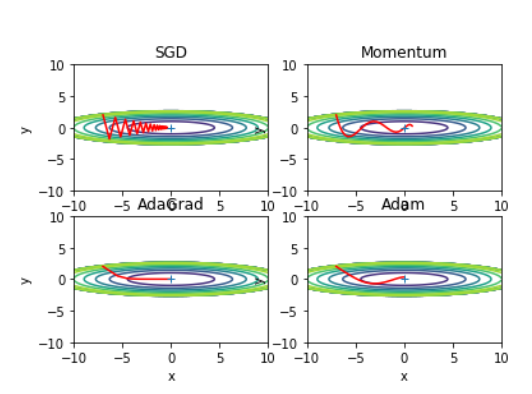

### 6.1.8 MNIST 데이터셋으로 본 갱신 방법 비교

숫자 인식을 대상으로 네 기법을 비교한 그래프는 optimizer_compare_mnist.py 참고  
각 층이 100개의 뉴런으로 구성된 5층 신경망에서 ReLU를 활성화 함수로 사용  
인식률은 AdaGrad > Adam > Momentum >> SGD 순서였음  
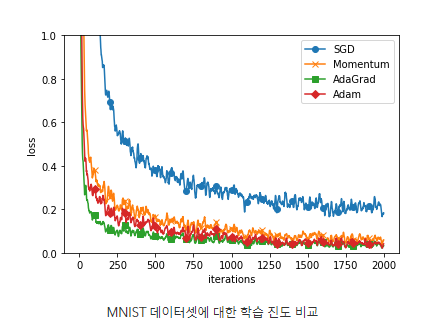

### 6.2.2 은닉층의 활성화값 분포

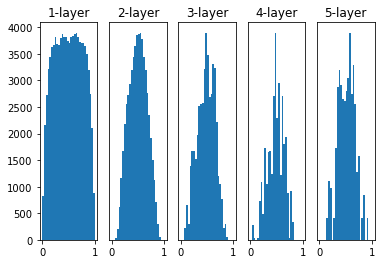

In [7]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)


input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    # w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

    a = np.dot(x, w)

    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0:
        plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0, 1))

plt.show()

활성화값들이 치우치면 표현력을 제한한다. 라는 관점에서 문제가 된다.

### 6.2.3 ReLU를 사용할 때의 가중치 초깃값

Xavier 초깃값은 활성화 함수가 선형인 것을 전제로 한다. 좌우 대칭인 함수는 중앙 부근이 선형이라  
볼 수 있어서 Xavier 초깃값이 적당하다. 반면 ReLU를 이용할 때는 이에 특화된 초깃값을 권장한다.  
이 초깃값을 발견자 카이밍 히의 이름을 따 He 초깃값이라고 한다.  
He 초깃값 : 초깃값의 표준편차가 √(2/n)이 되도록 설정(Xavier의 2배)  
n : 앞 층의 노드 수  
ReLU는 음수가 0이므로 더 넓게 퍼트리기 위해 계수가 2배여야 한다고 해석할 수 있다.  
ReLU를 사용한 경우, 0.01, xavier, He를 사용했을 때  
0.01은 활성화 값이 아주 작아 기울기 소실이 발생하며  
Xavier는 층이 깊어질 수록 치우침이 커진다.  
He는 모든 층에서 균일하게 분포되었다.  

## 6.3 배치정규화
앞 단에서는 각 층의 활성화값 분포를 관측해보며 분포가 적당히 퍼지면 학습이 원활하게 수행됨을 배웠다.  
그렇다면 '강제'로 퍼뜨린다면? -> 배치정규화(Batch Normalization)  
배치 정규화는 2015년에 제안되었으나 많은 연구자가 사용하고 있다. 배치 정규화의 장점은 다음과 같다.
 * 학습을 빨리 진행할 수 있다.
 * 초깃값에 크게 의존하지 않는다. ->> 골치 아픈 초깃값 선택 장애여 안녕!!
 * 오버피팅을 억제한다.(드롭아웃 등의 필요성 감소)
 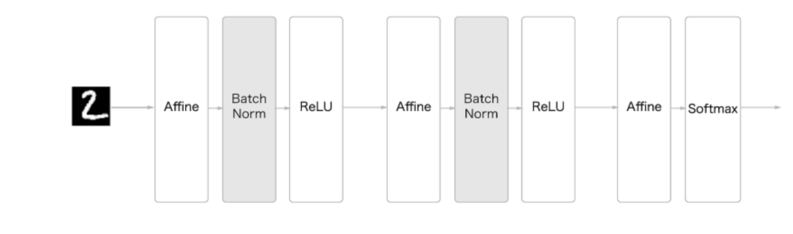

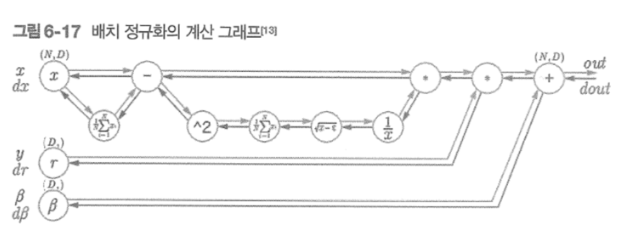

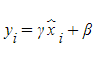

### 6.3.2 배치 정규화의 효과
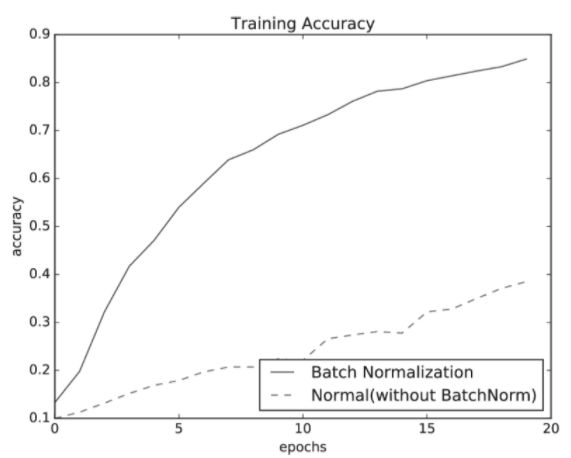

아래는 가중치 초깃값의 표준편차를 다양하게 바꿔가며 학습 경과를 관찰한 그래프


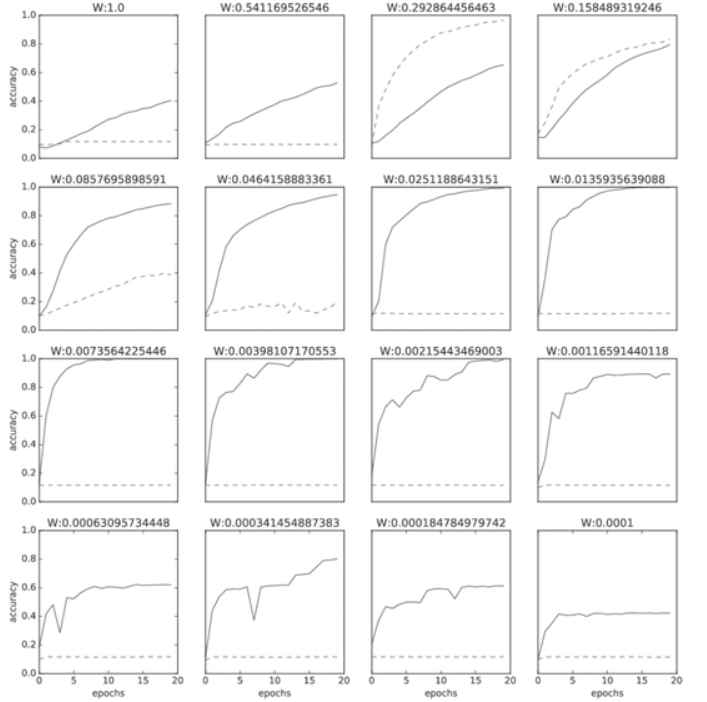

실제로 초깃값이 잘 분포가 되지 않았다면 학습이 전혀 진행되지 않는 모습도 확인할 수 있다.  
즉, 배치 정규화를 사용하면 학습이 빨라지며, 가중치 초깃값에 크게 의존하지 않아도 된다.

### 6.4.3 드롭 아웃
가중치 감소는 간단하게 구현할 수 있고 어느정도 오버피팅을 방지할 수 있지만 신경망 모델이  
복잡해지면 가중치 감소만으로는 대응하기 어려워진다. 이때 드롭아웃 기법을 사용한다.  
- 드롭아웃 : 뉴런을 임의로 삭제하면서 학습하는 방법. 훈련 때 은닉층의 뉴런을 무작위로 골라 삭제한다.  

훈련때는 데이터를 흘릴 때마다 삭제할 뉴런을 무작위로 선택하고 시험 때는 모든 뉴런에 신호를 전달.  
단, 시험 때는 각 뉴런의 출력에 훈련 때 삭제한 비율을 곱하여 출력한다.(안해도 됨)
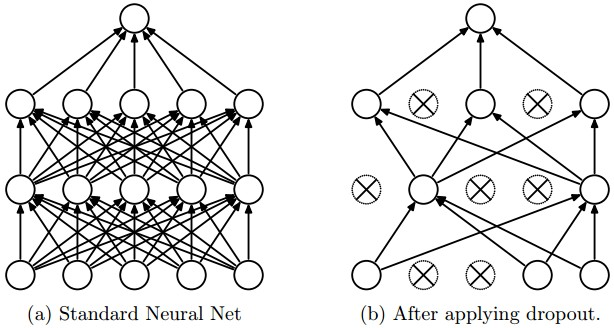

In [15]:
class Dropout:
    """
    순전파 때마다 mask에 삭제할 뉴런을 False로 표시한다. mask는 x와 같은 형상의 무작위 배열을
    생성하고 그 값이 dropout_ratio보다 큰 원소만 True로 설정한다.
    역전파 때의 동작은 ReLU와 같다.
    """
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask